# GRAFICOS DE BARRAS

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('C:/Users/jmorano/Documents/Plantillas personalizadas de Office/Coderhouse/Data Science/Modulo 2 - Data Science Fundamentos para la Ciencia de Datos II/Proyecto - Juan Martin Morano/Data/Processed/full_data_flightdelay_processed.csv', sep=',')

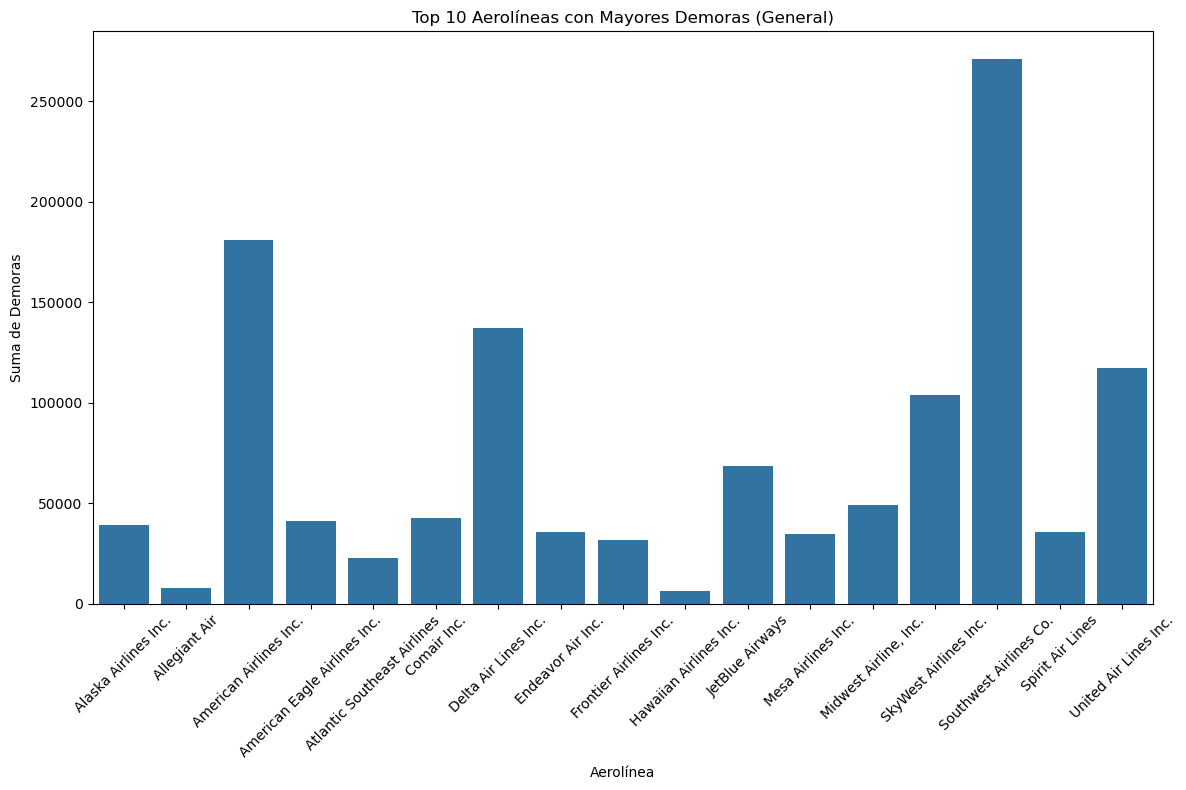

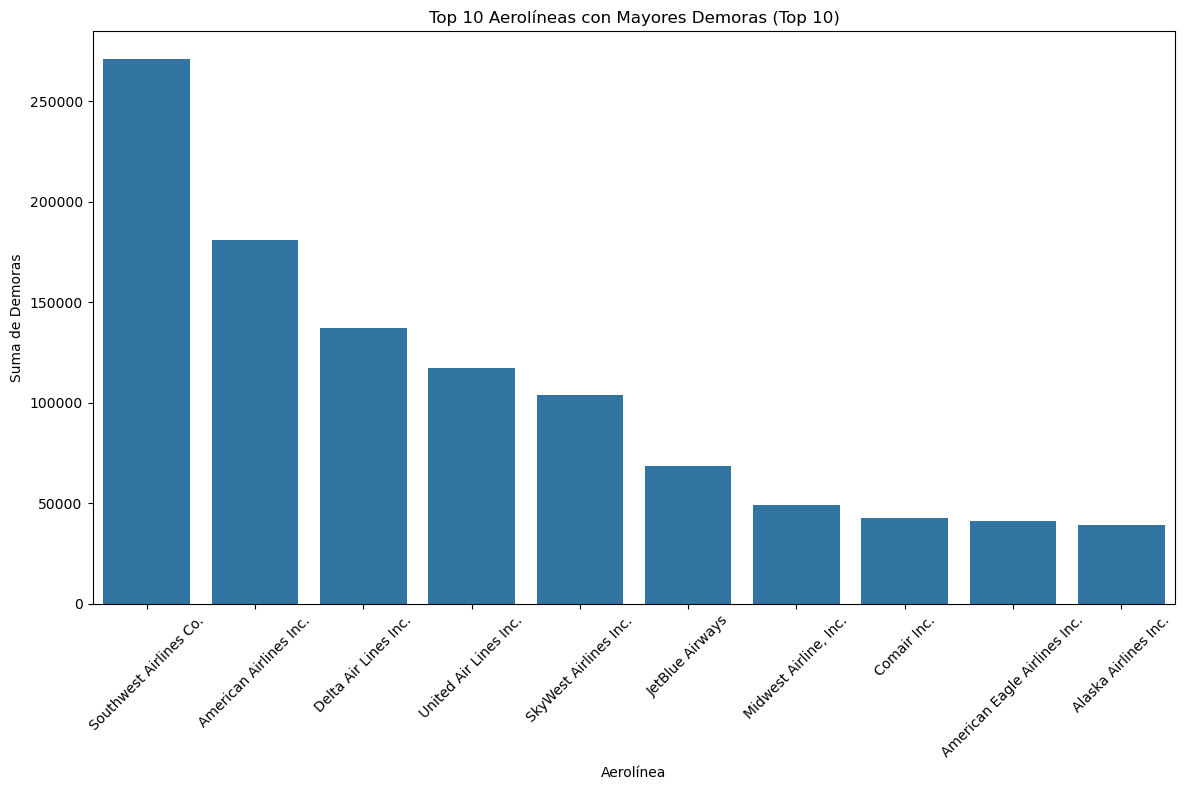

In [25]:
# Se realiza la agrupación por suma de DEP_DEL15 (suma de valores en 1 que representan que SI hubo una demora)
carrier_delays = df.groupby('CARRIER_NAME')['DEP_DEL15'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=carrier_delays, x='CARRIER_NAME', y='DEP_DEL15')
plt.title('Top 10 Aerolíneas con Mayores Demoras (General)')
plt.xlabel('Aerolínea')
plt.ylabel('Suma de Demoras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#--------------------------------------------------------------------------------
#En el siguiente gráfico pasamos a ordenar en un top 10 las principales aerolineas 
#de mayor a menor (en función de las demoras)

top10_categories = carrier_delays.nlargest(10, 'DEP_DEL15').sort_values(by='DEP_DEL15', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=top10_categories, x='CARRIER_NAME', y='DEP_DEL15')
plt.title('Top 10 Aerolíneas con Mayores Demoras (Top 10)')
plt.xlabel('Aerolínea')
plt.ylabel('Suma de Demoras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

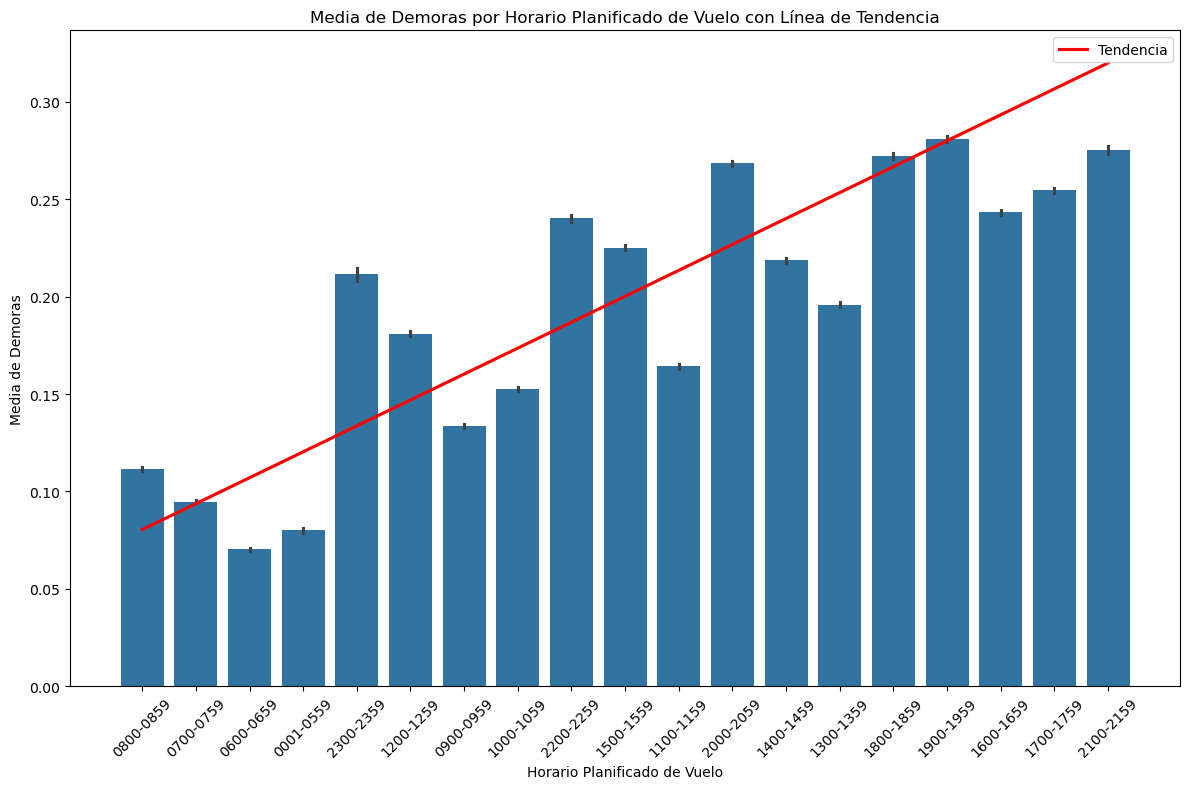

In [58]:
# Convertimos 'DEP_TIME_BLK' a valores numéricos para usar en la regresión
df['DEP_TIME_BLK_num'], _ = pd.factorize(df['DEP_TIME_BLK'], sort=True)

# Gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='DEP_TIME_BLK', y='DEP_DEL15')

# Agregamos la línea de tendencia
sns.regplot(data=df, x='DEP_TIME_BLK_num', y='DEP_DEL15', scatter=False, color='red', label='Tendencia')

# Títulos y etiquetas
plt.title('Media de Demoras por Horario Planificado de Vuelo con Línea de Tendencia')
plt.xlabel('Horario Planificado de Vuelo')
plt.ylabel('Media de Demoras')
plt.xticks(rotation=45, ticks=range(len(df['DEP_TIME_BLK'].unique())), labels=df['DEP_TIME_BLK'].unique())
plt.legend()
plt.tight_layout()
plt.show()

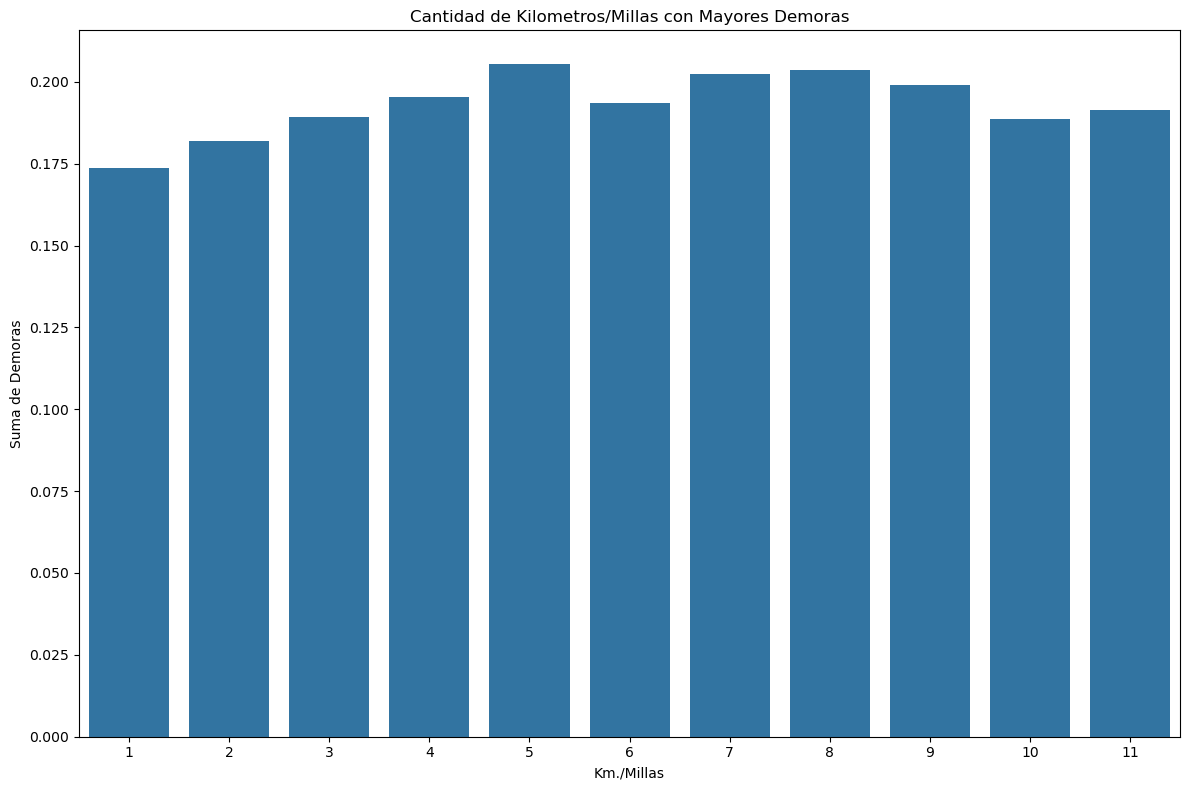

In [55]:
# Se realiza la agrupación por suma de DEP_DEL15 (suma de valores en 1 que representan que SI hubo una demora)
carrier_delays = df.groupby('DISTANCE_GROUP')['DEP_DEL15'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=carrier_delays, x='DISTANCE_GROUP', y='DEP_DEL15')
plt.title('Cantidad de Kilometros/Millas con Mayores Demoras')
plt.xlabel('Km./Millas')
plt.ylabel('Promedios de Demoras')
plt.tight_layout()
plt.show()

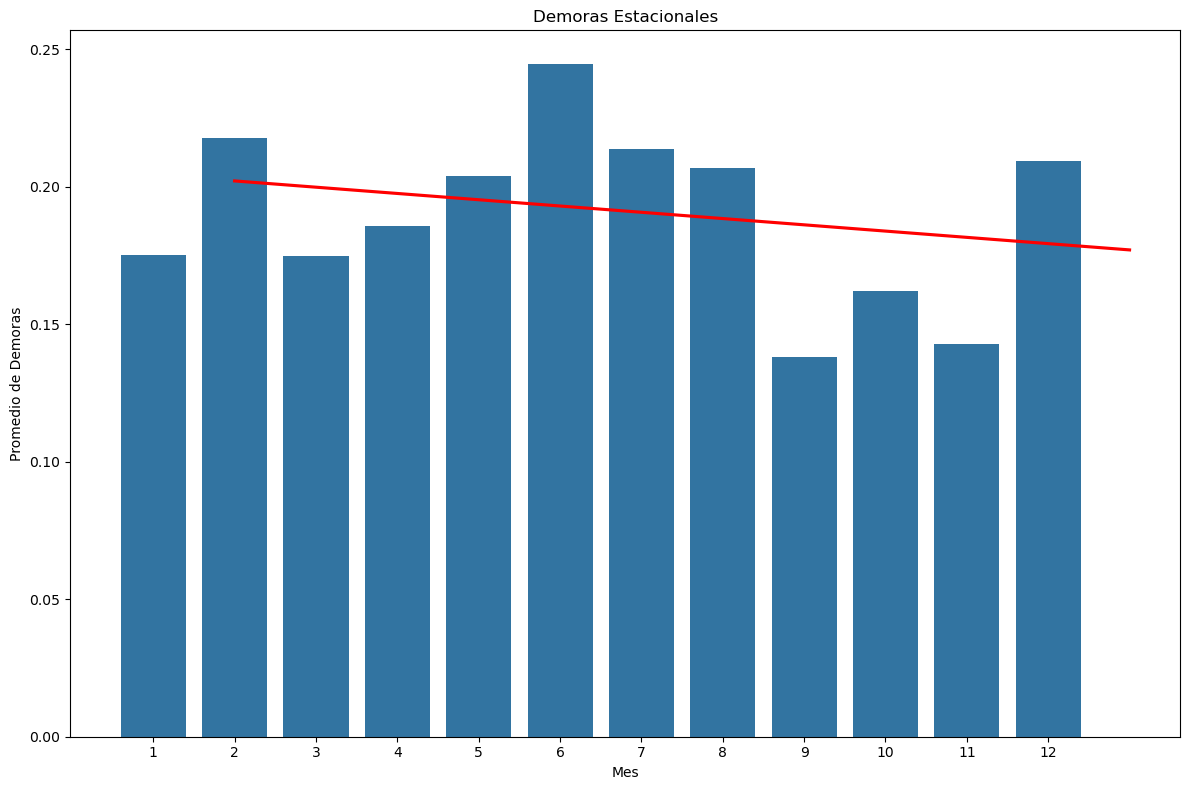

In [21]:
carrier_delays = df.groupby('MONTH')['DEP_DEL15'].mean().reset_index()

plt.figure(figsize=(12, 8))

# Gráfico de barras
sns.barplot(data=carrier_delays, x='MONTH', y='DEP_DEL15')

# Agregar línea de tendencia con regplot
sns.regplot(data=carrier_delays, x='MONTH', y='DEP_DEL15', scatter=False, color='red', line_kws={"label": "Tendencia"}, ci=None)

# Personalización del gráfico
plt.title('Demoras Estacionales')
plt.xlabel('Mes')
plt.ylabel('Promedio de Demoras')
plt.tight_layout()

plt.show()

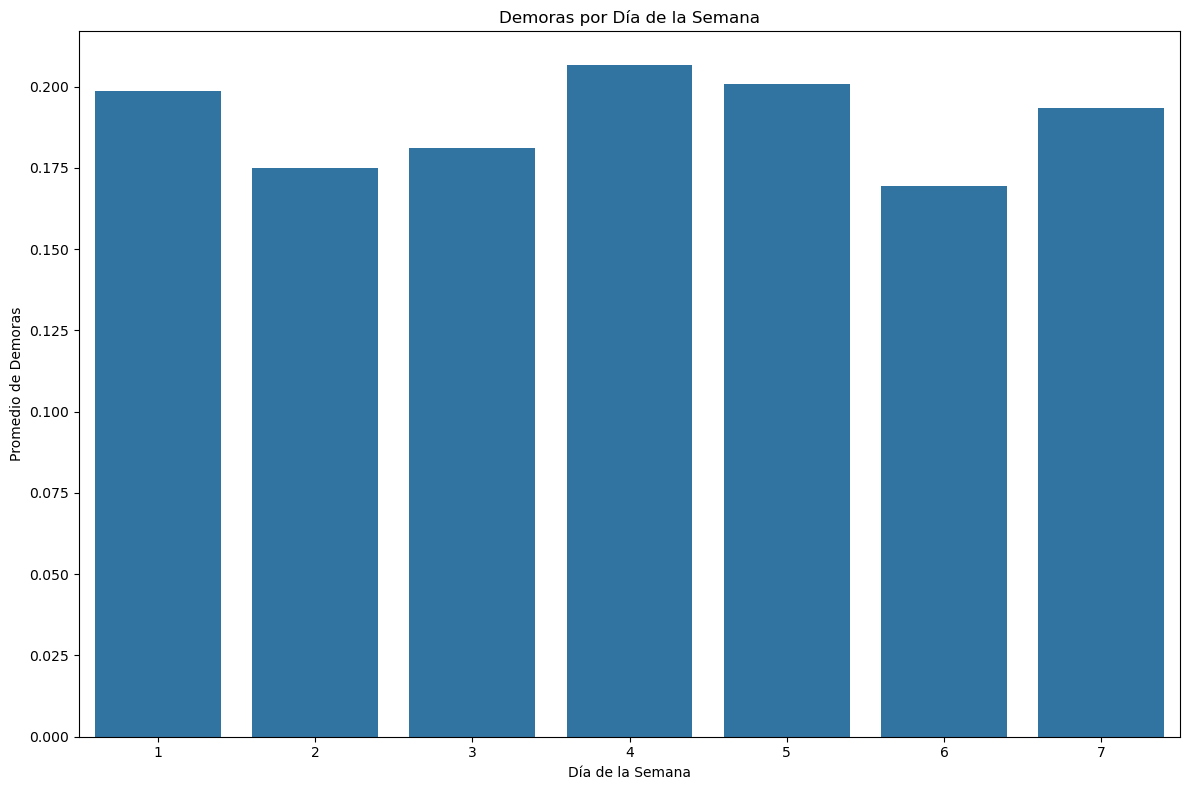

In [19]:
# Se realiza la agrupación por promedio de DEP_DEL15
carrier_delays = df.groupby('DAY_OF_WEEK')['DEP_DEL15'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=carrier_delays, x='DAY_OF_WEEK', y='DEP_DEL15')
plt.title('Demoras por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Promedio de Demoras')
plt.tight_layout()
plt.show()